In [8]:

import json 
import pandas as pd 
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:


def open_file(path):
    
    tweets = []
    with open(path) as file:
        for line in file: 
            if line.strip():
                tweets.append(json.loads(line))
                
    df = pd.json_normalize(tweets)
    
    df = df[["id","created_at","user.screen_name","user.verified"]]
    date = df['created_at'].to_list()
    date = [ i.split()[1] + " " + i.split()[2] + " " + i.split()[-1] for i in date ]
    df['date'] = date
    
    df.sort_values("id", inplace = True) 
    df.drop_duplicates(subset ="id", keep = False, inplace = True)
    
    return df



In [29]:
def open_file_for_class_c(path):
    
    df = pd.read_csv(path)
    
    date = df['created_at'].to_list()
    date = [ i.split()[0]for i in date ]
    df['date'] = date
    df.sort_values("id", inplace = True) 
    df.drop_duplicates(subset ="id", keep = False, inplace = True)
    
    return df

In [10]:

#No of tweets, users, verified and non-verified users 

def Tweets_Info(df):

    tweet = df.shape[0]
    print("Tweets: " + str(tweet)) 

    users = df['user.screen_name'].nunique()
    print("Users: " + str(users)) 

    df2 = df.loc[df['user.verified'] == True]
    verified_users = df2['user.screen_name'].nunique()
    print("Verified Users: " + str(verified_users)) 

    df2 = df.loc[df['user.verified'] == False]
    Non_verified_users = df2['user.screen_name'].nunique()
    print("Non Verified Users: " + str(Non_verified_users)) 


In [33]:

#time series data plot

def Time_series(df):
    
    df2 = df.groupby('date').count()
    dates = list(df2.index.values)
    df2['Date of Tweet'] = dates
    df2.rename(columns={"id": "#Tweets"}, inplace=True)
    df2.plot(x ='Date of Tweet', y="#Tweets", kind = 'line')
    plt.xticks(rotation=50)
    plt.show()
    


In [30]:
print("--------Sushant tweets--------")
df = open_file('../data/twitter_sushant.json')
df

--------Sushant tweets--------


,id,created_at,user.screen_name,user.verified,date
12025,1285202721663062016,Mon Jul 20 13:19:41 +0000 2020,BhuniaRinku,False,Jul 20 2020
12026,1285202724187803649,Mon Jul 20 13:19:42 +0000 2020,SGFCSL,False,Jul 20 2020
12027,1285202751811543046,Mon Jul 20 13:19:48 +0000 2020,Akansha63361787,False,Jul 20 2020
12028,1285202798687121408,Mon Jul 20 13:19:59 +0000 2020,Madhavi18681260,False,Jul 20 2020
12029,1285202809487454213,Mon Jul 20 13:20:02 +0000 2020,SRKzKaali,False,Jul 20 2020
...,...,...,...,...,...
43179,1286811178434359299,Fri Jul 24 23:51:07 +0000 2020,SaeedMadridsta,False,Jul 24 2020
43180,1286811181458624519,Fri Jul 24 23:51:08 +0000 2020,Meens_style,False,Jul 24 2020
43181,1286811183857537025,Fri Jul 24 23:51:08 +0000 2020,BringSSRJustice,False,Jul 24 2020
43182,1286811211837800448,Fri Jul 24 23:51:15 +0000 2020,Jishnusc,False,Jul 24 2020


In [31]:
print("--------Sushant tweets Info--------")
Tweets_Info(df)

--------Sushant tweets Info--------
Tweets: 43149
Users: 19159
Verified Users: 119
Non Verified Users: 19040


--------Sushant tweets Info--------


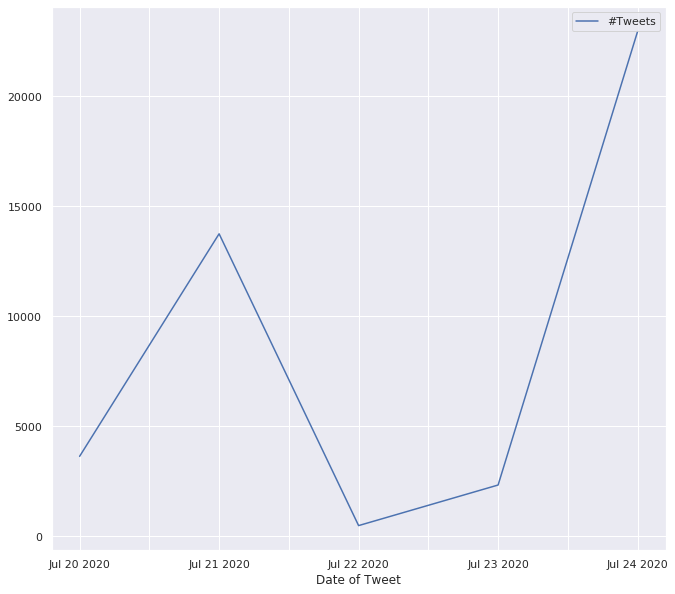

In [32]:
print("--------Sushant tweets Info--------")
Time_series(df)

In [8]:
print("--------Covid tweets--------")
df = open_file('../data/twitter_data.json')
df

--------Covid tweets--------


,id,created_at,user.screen_name,user.verified,date
32028,1285208928280666113,Mon Jul 20 13:44:21 +0000 2020,avinashmehi,False,Jul 20 2020
32029,1285208929274912769,Mon Jul 20 13:44:21 +0000 2020,Cartola_70,False,Jul 20 2020
32030,1285208929778229248,Mon Jul 20 13:44:21 +0000 2020,arm_marc,False,Jul 20 2020
32031,1285208932462600196,Mon Jul 20 13:44:22 +0000 2020,jtc29,False,Jul 20 2020
32032,1285208932709855233,Mon Jul 20 13:44:22 +0000 2020,ArpitaB04244380,False,Jul 20 2020
...,...,...,...,...,...
32023,1286560191820038145,Fri Jul 24 07:13:47 +0000 2020,ChloeWells1,False,Jul 24 2020
32024,1286560191962546176,Fri Jul 24 07:13:47 +0000 2020,justdosomegood,False,Jul 24 2020
32025,1286560192067297280,Fri Jul 24 07:13:47 +0000 2020,rakesh_23t,False,Jul 24 2020
32026,1286560192721821696,Fri Jul 24 07:13:47 +0000 2020,AlphaRadioKE,False,Jul 24 2020


In [9]:
print("--------Covid tweets Info--------")
Tweets_Info(df)

--------Covid tweets Info--------
Tweets: 97251
Users: 76324
Verified Users: 1392
Non Verified Users: 74932


--------Time Series--------


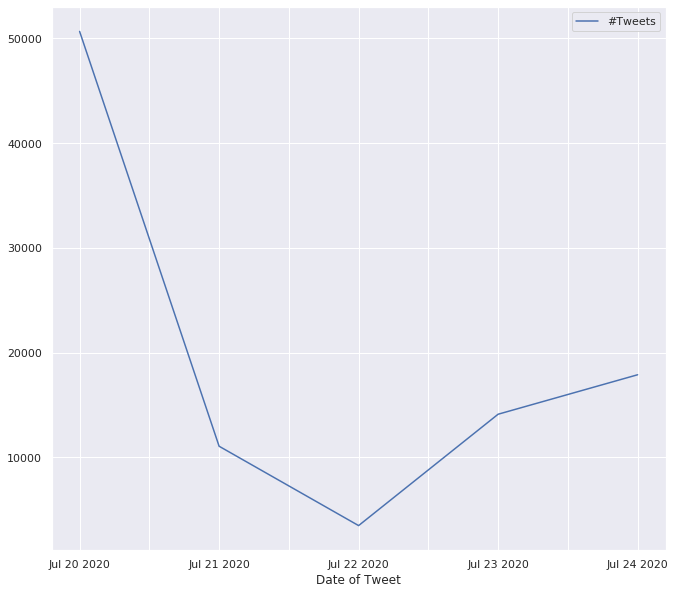

In [29]:
print("--------Time Series--------")
Time_series(df)


In [30]:
print("-------- Class C tweets--------")
df = open_file_for_class_c('../twitter.csv')
df

-------- Class C tweets--------


,created_at,id,text,user.verified,user.screen_name,user.id,date
37,2020-07-17 02:56:35,1.283959e+18,For more interesting facts 🤓 follow me @iknowf...,False,iknow_facts,1.123084e+18,2020-07-17
36,2020-07-17 03:15:06,1.283963e+18,RT @iknow_facts: For more interesting facts 🤓 ...,False,CalFactCheck,9.500603e+17,2020-07-17
35,2020-07-17 11:08:53,1.284083e+18,For more interesting facts 🤓 follow me @iknowf...,False,iknow_facts,1.123084e+18,2020-07-17
34,2020-07-17 11:15:15,1.284084e+18,RT @iknow_facts: For more interesting facts 🤓 ...,False,CalFactCheck,9.500603e+17,2020-07-17
33,2020-07-18 01:47:20,1.284304e+18,For more interesting facts 🤓 follow me @iknowf...,False,iknow_facts,1.123084e+18,2020-07-18
32,2020-07-18 10:49:58,1.284440e+18,For more interesting facts 🤓 follow me @iknowf...,False,iknow_facts,1.123084e+18,2020-07-18
31,2020-07-18 12:20:18,1.284463e+18,Seeing the pics n videos of #SushantSinghRajpu...,False,ahm_Babuan_asmi,1.940481e+08,2020-07-18
30,2020-07-18 12:20:28,1.284463e+18,RT @ahm_Babuan_asmi: Seeing the pics n videos ...,False,Justice_4OurSSR,1.278305e+18,2020-07-18
29,2020-07-18 12:22:16,1.284463e+18,RT @ahm_Babuan_asmi: Seeing the pics n videos ...,False,SsrAlways1,1.283745e+18,2020-07-18
28,2020-07-18 12:23:54,1.284464e+18,RT @ahm_Babuan_asmi: Seeing the pics n videos ...,False,siddharth8358,2.534295e+08,2020-07-18


In [31]:
print("--------Class C tweets Info--------")
Tweets_Info(df)

--------Class C tweets Info--------
Tweets: 38
Users: 20
Verified Users: 0
Non Verified Users: 20


--------Time Series--------


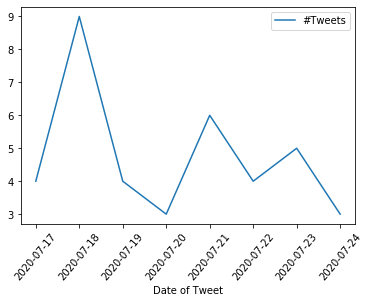

In [34]:
print("--------Time Series--------")
Time_series(df)